In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r"C:\Users\Yashita\Desktop\Projects\Project - Flight Price Prediction\Data_Train.xlsx")

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
data = train_data.copy()

In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [14]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data["Journey_date"] = data["Date_of_Journey"].dt.day

In [19]:
data["Journey_month"]  = data["Date_of_Journey"].dt.month

In [20]:
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [21]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_date                int64
Journey_month               int64
Journey_year                int64
dtype: object

In [22]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-06-25 18:05:00,2024-06-25 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-06-25 16:50:00,2024-06-25 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [23]:
data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_date       0
Journey_month      0
Journey_year       0
dtype: int64

In [25]:
data.drop(columns=["Date_of_Journey"])

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-06-25 18:05:00,2024-06-25 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-06-25 16:50:00,2024-06-25 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2024-06-25 19:55:00,2024-06-25 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2024-06-25 20:45:00,2024-06-25 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2024-06-25 08:20:00,2024-06-25 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2024-06-25 11:30:00,2024-06-25 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [26]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [27]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [28]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [29]:
data.drop(columns=["Arrival_Time","Dep_Time"])

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [30]:
data.shape

(10682, 18)

In [31]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [32]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: >

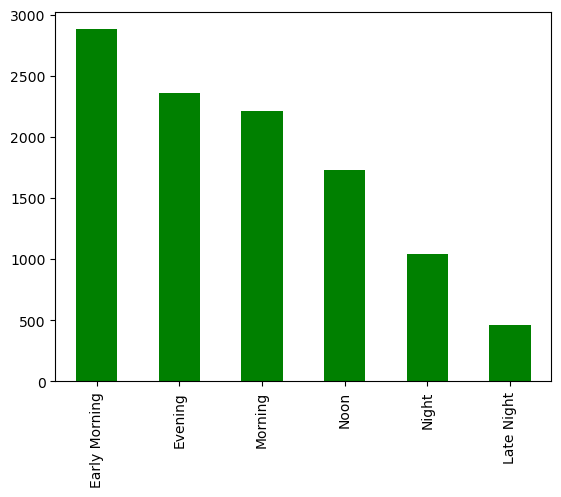

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="green")

In [34]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h'+' '+x
    elif 'm' not in x:
        x = x+' '+'0m'
        
    return x

In [35]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [36]:
data['Duration'][0]

'2h 50m'

In [37]:
'2h 50m'.split(' ')

['2h', '50m']

In [38]:
'2h 50m'.split(' ')[0]

'2h'

In [39]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [40]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [41]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [42]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [43]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [44]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [45]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
data['Duration_total_mins'] = data['Duration_hours']*60 + data['Duration_mins']

In [47]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-06-25 18:05:00,2024-06-25 23:30:00,5h 25m,1 stop,No info,...,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-06-25 16:50:00,2024-06-25 21:35:00,4h 45m,1 stop,No info,...,3,1,2019,16,50,21,35,4,45,285


In [48]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Dep_Time               datetime64[ns]
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_date                    int64
Journey_month                   int64
Journey_year                    int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
Duration_hours                  int64
Duration_mins                   int64
Duration_total_mins             int64
dtype: object

In [49]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

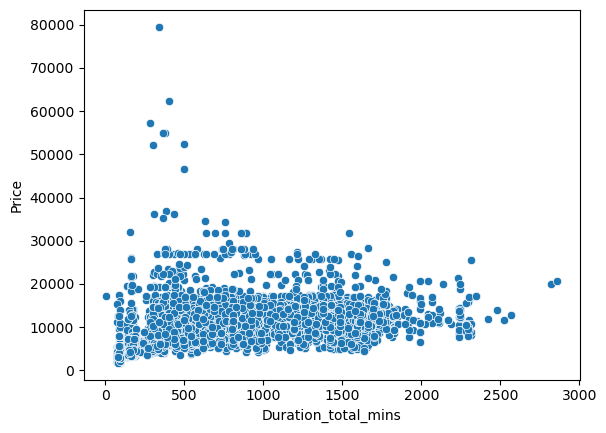

In [50]:
sns.scatterplot(x="Duration_total_mins" , y="Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

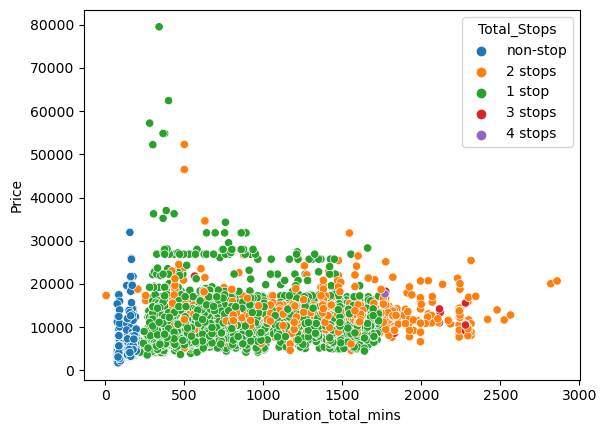

In [51]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

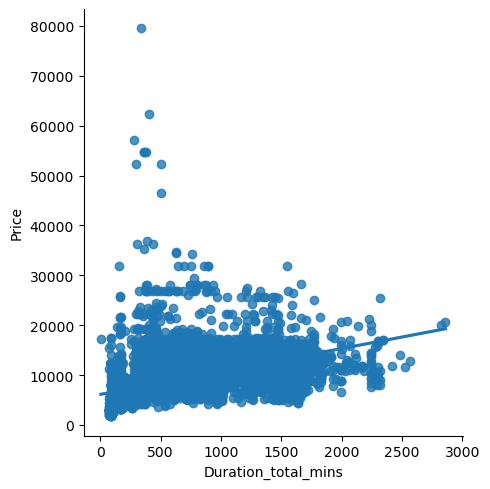

In [52]:
#For the regression plots 
sns.lmplot(x="Duration_total_mins" , y="Price", data=data)

In [53]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [54]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

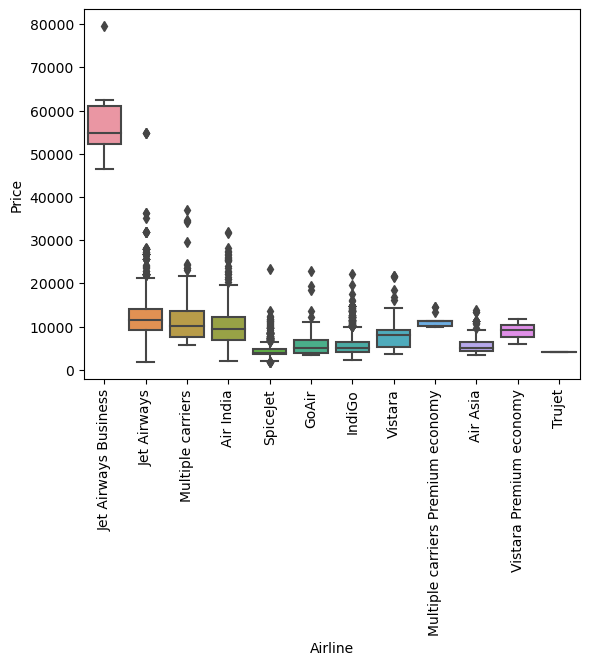

In [55]:
sns.boxplot(y='Price' , x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [56]:
# Applying in one-hot encoding 
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,5,1,2019,5,50,13,15,7,25,445


In [57]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [58]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [59]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [60]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [61]:
data['Source'].apply(lambda x : 1 if x=='Bangalore' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [62]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x==sub_category else 0)

In [63]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [64]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [65]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0


In [66]:
data['Airline'].nunique()

12

In [67]:
##Now we will apply target guided encoding . 
## First we will take out the average price of each airlines and sort them , then we will give them importance according to their price , for ex-> lowest one will get 0 , the highest will get the max . Then we will convert them into dictionary
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [68]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [69]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [70]:
dict_airlines = {key:index for index , key in enumerate(airlines,0)}

In [71]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [72]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [73]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [74]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [75]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [76]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [77]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [78]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [79]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [80]:
dict_dest = {key:index for index , key in enumerate(dest,0)}

In [81]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [82]:
data['Destination']= data['Destination'].map(dict_dest)

In [83]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [84]:
#Here we have converted the destination column into a numerical column so that ML algorithm can learn from the numerical values 
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [85]:
##Now we will perform Manual encoding on Data 
## Remove un-necessary features 

In [86]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [87]:
#Now we are doing encoding on the Total Stop column to convert it into numerical data
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [88]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [89]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [90]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [91]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [92]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,...,1,10,2,50,170,1,0,0,0,0


In [93]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [94]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [95]:
#Now we can see that most of the flights donot have any information provided to us . Thus we cam drop this Additional_info column

In [96]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2,No info,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,2024-06-25 18:05:00,2024-06-25 23:30:00,5h 25m,1,No info,...,23,30,5,25,325,0,1,0,0,0


In [97]:
#We can also drop this route feature as we can can infer about it from the combination of total_stop feature and the destination feature

In [98]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [99]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'], axis=1, inplace=True)

In [100]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [101]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [102]:
data.head(3)

,Airline,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [103]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [104]:
data.head(3)

,Airline,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2024-06-25 22:20:00,2024-03-22 01:10:00,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2024-06-25 05:50:00,2024-06-25 13:15:00,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2024-06-25 09:25:00,2024-06-10 04:25:00,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [105]:
data.drop(columns=['Dep_Time','Arrival_Time'], axis=1, inplace=True)

In [106]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [107]:
#Now we will perform outlier detection and furthur we will know how to deal with the outlier 
#Outliers are the value which can somewhat be extremely low or extremely high 
# One of the best method to identify a outlier is by data visualisation 
# We can use a box plot for this matter to identify an outlier 

In [108]:
# So we will use 3 plots -> distribution , box plot and histogram to visualise the data and look at the outliers present 

In [109]:
def plot(df,col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax1, kde=False)

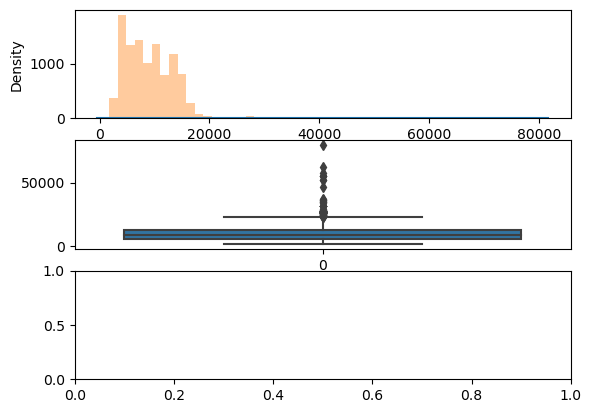

In [110]:
plot(data, 'Price')

In [111]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr=q3-q1

maximum = q3+ 1.5*iqr
minimum = q1-1.5*iqr

In [112]:
print(maximum)

23017.0


In [113]:
print(minimum)

-5367.0


In [114]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [115]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [116]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

In [117]:
# We replace by the median insteas of mean because if we replace all the values to the mean , then the net mean would change , whereas median is a middle value so it wont affect the mean so much 

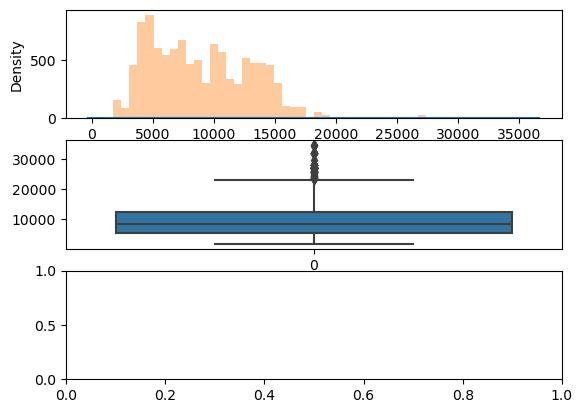

In [127]:
plot(data, 'Price')

In [128]:
#Now we will build the Machine Learning Model 
# Then we will save the model

In [133]:
X=data.drop(['Price'], axis=1)

In [134]:
y=data['Price']

In [135]:
X

,Airline,Destination,Total_Stops,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4,9,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,3,1,11,30,14,10,2,40,1,0,0,0,0


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [138]:
# a..Initially ,lets build basic random model.
# b..then later-on , we will try to improve this model using some parameters..
# c..Then we will try to improve it..
# d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..


In [139]:
from sklearn.ensemble import RandomForestRegressor 

In [140]:
ml_model = RandomForestRegressor()

In [141]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [142]:
y_pred = ml_model.predict(X_test)

In [143]:
y_pred

array([16689.15,  6330.52,  8825.01, ...,  3461.14,  6249.79,  7215.81])

In [144]:
from sklearn import metrics 

In [145]:
metrics.r2_score(y_test, y_pred)

0.8081797348394727

In [146]:
## Lets Save the model 

In [147]:
# advantage of dumping--
# imagine in future we have new data & lets say we have to predict price on this huge data

# then to do prediction on this new data , we can use this pre-trained model what we have dumped..

In [148]:
!pip install pickle 

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [149]:
import pickle 

In [150]:
file = open(r'C:\Users\Yashita\Desktop\Projects\Project - Flight Price Prediction/rf_random.pk1', 'wb')

In [151]:
pickle.dump(ml_model, file)

In [156]:
model = open(r'C:\Users\Yashita\Desktop\Projects\Project - Flight Price Prediction/rf_random.pk1' , 'rb')

In [157]:
forest = pickle.load(model)

In [158]:
forest.predict(X_test)

array([16689.15,  6330.52,  8825.01, ...,  3461.14,  6249.79,  7215.81])

In [159]:
y_pred2 = forest.predict(X_test)

In [160]:
metrics.r2_score(y_test, y_pred2)

0.8081797348394727

In [161]:
# How to define your evaluation metric 
# How to automate ml pipeline!

In [173]:
## MAPE-> Mean absolute percentage error 
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [175]:
mape(y_test, y_pred)

13.253268312478378

In [176]:
from sklearn import metrics 

In [177]:
def predict(ml_model):
    model= ml_model.fit(X_train, y_train)
    print('Training score:{}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are:{}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score :{}'.format(r2_score))
    print('MAE :{}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE :{}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE :{}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE :{}'.format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score:0.9514368456459202
predictions are:[16647.13  6321.81  8856.51 ...  3499.35  6286.1   7126.62]


r2 score :0.8065785719738245
MAE :1180.4782188344643
MSE :3765450.9275293946
RMSE :1940.4769845399853
MAPE :13.218021773341063


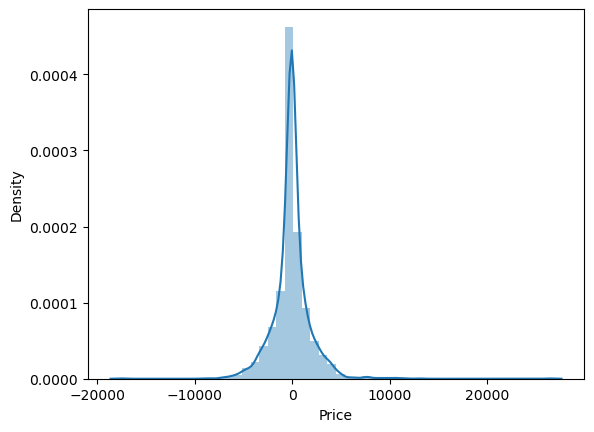

In [172]:
predict(RandomForestRegressor())

In [178]:
from sklearn.tree import DecisionTreeRegressor

Training score:0.966591628243878
predictions are:[16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score :0.69560594707634
MAE :1370.092911518782
MSE :5925821.562855568
RMSE :2434.3010419534326
MAPE :15.175039143743845


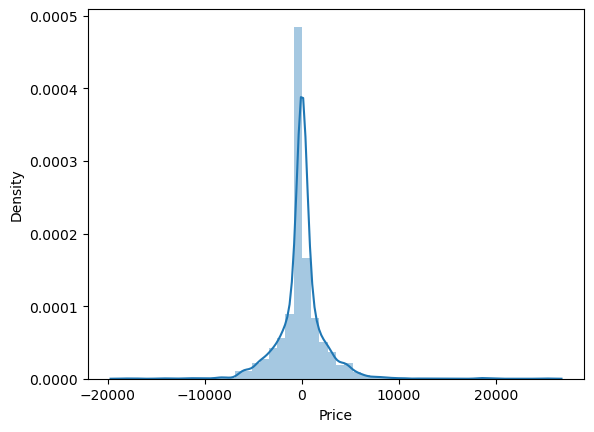

In [179]:
predict(DecisionTreeRegressor())

In [180]:
#How to hypertune the Algorithm 

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
reg_rf = RandomForestRegressor()

In [183]:
np.linspace(start=100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [184]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [185]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [186]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [189]:
# Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3)

In [190]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]})

In [191]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=540)

In [194]:
rf_random.best_score_

0.8103186966375812